## Intro to pytorch and tensors

> Note: This is a notebook which has cells. Each cell is either code or document.   
> Press shift+enter to run a cell.   
> Press Esc+a or Esc+b to create a cell. 

<img src="https://github.com/vijayDL/learning-pytorch/blob/main/intro/assets/dl.png?raw=true" width="400">

> Computer algorithms are automated instructions which comprises of AI, ML and DL (Deep learning).  

> AI can be described as the effort to automate intellectual tasks normally performed by humans. AI is a general field that encompasses machine learning and deep learning, but that also includes many more approaches that may not involve any learning. 

> A ML system is a subset of AI, which is trained rather than explicitly programmed. The machine looks at the input data and the corresponding answers, and figures out what the rules
should be.  

> DL is a subset of ML, which is a deep layered representation of learning achieved via a neural network. Basically a large neural network.  

## Deep learning

> We will study NN and go through the elements required to build a NN using pytorch

## What is pytorch?
> PyTorch is an open source Deep learning framework based on python, used for applications such as computer vision and natural language processing, primarily developed by Meta AI. It is free and open-source software released under the Modified BSD license.

### Installation

> **Locally:**  Do it if you have a GPU in your PC. Otherwise its better to work with google colab which gives free GPU. For local install follow: https://pytorch.org/get-started/locally/

> **On Google colab:** Select runtime->Change runtime type -> hardware accelarator -> GPU. Pytorch comes build with, so you dont need to install anything for now.

In [1]:
import torch

#Print torch version
print('Version:', torch.__version__)


Version: 1.8.0+cu111


In [2]:
#Torch works on CPU but its very slow. GPUs are needed for most cases. 
#To check whether torch can access those GPUs, we need to do.

print('GPU available:', torch.cuda.is_available())
print('How many GPUs available:', torch.cuda.device_count()) 

GPU available: True
How many GPUs available: 2


In [3]:
# A torch.device is an object representing the device on which 
# a torch.Tensor (an array which we will study later) is or will be allocated

#0 is for 1st GPU, if you have more than one then set 'cuda:1' and so on

device = torch.device('cuda:0') 
device

device(type='cuda', index=0)

In [4]:
device = torch.device('cpu') #for CPU 
device

device(type='cpu')

In [5]:
# get GPU properties
device = torch.device('cuda:0') 
torch.cuda.get_device_properties(device)

_CudaDeviceProperties(name='NVIDIA RTX A5000', major=8, minor=6, total_memory=24253MB, multi_processor_count=64)

### Basic Building blocks

#### Tensors
> A Tensor is a multi-dimensional matrix containing elements of a single data type.

<img style="float: left" src="https://github.com/vijayDL/learning-pytorch/blob/main/intro/assets/1d_tensor.png?raw=true"  width="400">   



**Enter: Numpy.** Numpy is python libary used for working with arrays, matrices. Pytorch implements most of numpy, but we will first use numpy to understand tensors

In [6]:
import numpy as np #importing the numpy module, assigning it as 'np'

In [7]:
# Zero dimension
#Scalar example from above image
a0 = np.array(4)

In [8]:
a0.shape, a0.dtype #This prints the shape and type 

((), dtype('int64'))

In [9]:
#1-dimension
#vector example
a1 = np.array([2.0, 3.0, 4.0])
print(a1.shape)
print(a1.dtype)

(3,)
float64


In [10]:
#2-dimension
#matrix example
a2 = np.array([[1,2],[3,4],[5,6]])
a2.shape, a2.dtype

#one should read the above as there are 3, 2dim arrays

((3, 2), dtype('int64'))

**HIGHER dimensions**

<img style="float: left" src="https://github.com/vijayDL/learning-pytorch/blob/main/intro/assets/3d_tensor.png?raw=true"  width="400">   


In [11]:
#the above image is dimension 3

#First we generate 2 dimen arrays

a3_1 = np.array([[0,1,2,3,4], [5,6,7,8,9]])
a3_1

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [12]:
a3_2 = np.array([[10, 11, 12, 13, 14],[15, 16, 17, 18, 19]])
a3_2

array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [13]:
a3_3 = np.array([[20, 21, 22, 23, 24],[25, 26, 27, 28, 29]])
a3_3

array([[20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [14]:
a3_1.shape, a3_2.shape, a3_3.shape

((2, 5), (2, 5), (2, 5))

In [15]:
#So the above we have 3, (2, 5) dimensional arrays. if we put them together we can get 3d array
a3 = np.array([[[0,1,2,3,4], [5,6,7,8,9]], 
               [[10, 11, 12, 13, 14],[15, 16, 17, 18, 19]],
               [[20, 21, 22, 23, 24],[25, 26, 27, 28, 29]]])
a3

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

In [16]:
a3.shape

(3, 2, 5)

In [17]:
#we can also do
a3 = np.array([a3_1, a3_2, a3_3])
a3

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

**4d-tensor**

<img style="float: left" src="https://github.com/vijayDL/learning-pytorch/blob/main/intro/assets/nd_tensor.png?raw=true"  width="400">   


 We can see there are 4, 3 dimension array of size (3,2,5) so the array size is (4,3,2,5)

In [18]:
a4 = np.array([a3, a3, a3, a3]) #for simplicity i used the same (3, 2, 5)

In [19]:
a4.shape

(4, 3, 2, 5)

### An common n-d array we use for computer vision: *set of images*

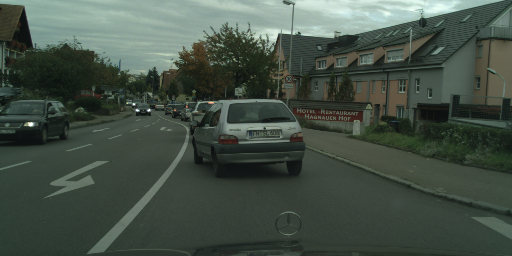

In [20]:
#Ignore this cell of how the images are loaded, we will revist later.
from PIL import Image
import urllib.request
urllib.request.urlretrieve("https://github.com/vijayDL/learning-pytorch/blob/main/intro/assets/lindau_0.png?raw=true", "lindau_0.png")

img1 = Image.open('lindau_0.png')
img1

In [21]:
#we convert it to numpy array
img1 = np.array(img1)

In [22]:
img1.shape

(256, 512, 3)

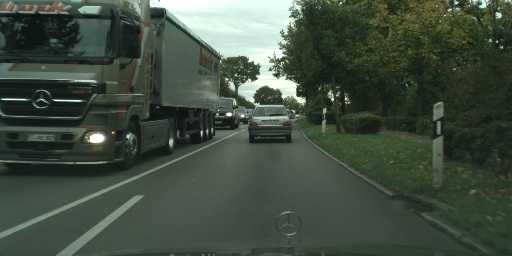

In [23]:
#Now lets load another image
urllib.request.urlretrieve("https://github.com/vijayDL/learning-pytorch/blob/main/intro/assets/lindau_1.png?raw=true", "lindau_1.png")

img2 = Image.open('lindau_1.png')
img2

In [24]:
set_of_images = np.array([np.array(img1), np.array(img2)]) #img1, img2 are PIL arrays, we need to convert to numpy

In [25]:
set_of_images.shape

(2, 256, 512, 3)

In [26]:
#The above is the most common form of input we feed to a network for image tasks
# (batch, height, width, channels) will be the input to the NN.

#### Tensor operations

In [27]:
data = np.array([1, 2, 3, 4, 5, 6])

In [28]:
#indexing and slicing
print('1st element:',data[0]) 
print('last element:',data[-1]) 
print('1st to 3 element:',data[:3]) 
print('3nd to 3 element:',data[1:3]) 

1st element: 1
last element: 6
1st to 3 element: [1 2 3]
3nd to 3 element: [2 3]


In [29]:
print('all elements < 5:', data[data < 5]) 

all elements < 5: [1 2 3 4]


In [30]:
print('all odd numbers:', data[data%2==0]) 

all odd numbers: [2 4 6]


In [31]:
print('all numbers >= 2 but < 5:', data[(data>=2) & (data<5)]) 

all numbers >= 2 but < 5: [2 3 4]


In [32]:
data1 = np.array([1, 2, 3, 4, 5, 6])
data2 = np.array([7, 8, 9, 10, 11, 12])

In [33]:
v = np.vstack((data1, data2)) #stack vertically
print(v)
print('shape:',v.shape)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
shape: (2, 6)


In [34]:
h = np.hstack((data1, data2)) #stack vertically
print(h)
print('shape:', h.shape)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
shape: (12,)


In [35]:
#reshape an array to different dimension
data1_reshape = data1.reshape(2,3)
data1_reshape

array([[1, 2, 3],
       [4, 5, 6]])

In [36]:
print('data1 of shape {} is replaced to {}'.format(data1.shape, data1_reshape.shape))

data1 of shape (6,) is replaced to (2, 3)


In [37]:
# Sum of all the numbers in the matrix
print('sum of data1 and data1_reshape:', np.sum(data1), np.sum(data1_reshape))

sum of data1 and data1_reshape: 21 21


In [38]:
#Sum along a particular direction
print(data1_reshape)
np.sum(data1_reshape, axis=0)

[[1 2 3]
 [4 5 6]]


array([5, 7, 9])

In [39]:
np.sum(data1_reshape, axis=1)

array([ 6, 15])

In [40]:
#Broadcasting - operations between arrays of different dimensions
data1_reshape * 2

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [41]:
print(data1_reshape)
data1_reshape * np.array([1, 2, 3]) #Broadcasting - each cols is multipled with a different number

[[1 2 3]
 [4 5 6]]


array([[ 1,  4,  9],
       [ 4, 10, 18]])

In [42]:
#matrix transpose
data1_reshape.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [43]:
#matrix multiplcation
data1 = np.array([1, 2, 3, 4, 5, 6]).reshape(3, 2)
data2 = np.array([7, 8, 9, 10, 11, 12]).reshape(2, 3)
np.matmul(data1, data2)

array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]])

In [44]:
# dot product
data1 = np.array([1, 2, 3, 4, 5, 6]).reshape(3, 2)
data2 = np.array([7, 8, 9, 10, 11, 12]).reshape(3, 2)
#both matrix should be of same size, and element by element multiplication
data1*data2

array([[ 7, 16],
       [27, 40],
       [55, 72]])

In [45]:
#addition
data1+data2

array([[ 8, 10],
       [12, 14],
       [16, 18]])

### torch tensors

In [46]:
# to convert numpy to torch tensor

t_data1 = torch.tensor(data1)

In [47]:
t_data1

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [48]:
t_data1.dtype, t_data1.shape


(torch.int64, torch.Size([3, 2]))

In [49]:
t_data1.device 

device(type='cpu')

In [50]:
t_data1 = t_data1.to('cuda:0') #move the tensor to GPU
t_data1 

tensor([[1, 2],
        [3, 4],
        [5, 6]], device='cuda:0')

In [51]:
#slicing operations
t_data1[:,1] 

tensor([2, 4, 6], device='cuda:0')

In [52]:
t_data1[1,:]

tensor([3, 4], device='cuda:0')

In [53]:
t_data1[1:, :]

tensor([[3, 4],
        [5, 6]], device='cuda:0')

In [54]:
t_data2 = torch.tensor([7, 8, 9, 10, 11, 12]).reshape(3,2).to('cuda:0')


In [55]:
t_data2

tensor([[ 7,  8],
        [ 9, 10],
        [11, 12]], device='cuda:0')

In [56]:
#dot product
t_data1 * t_data2

tensor([[ 7, 16],
        [27, 40],
        [55, 72]], device='cuda:0')

In [57]:
#matmul
torch.matmul(t_data1, t_data2.T)

RuntimeError: "addmm_cuda" not implemented for 'Long'

In [58]:
#the above error is because data types are 64bit ints, lets change it float
t_data1 = t_data1.to(torch.float32)
t_data2 = t_data2.to(torch.float32)

In [59]:
t_data1

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], device='cuda:0')

In [60]:
#matmul
torch.matmul(t_data1, t_data2.T)

tensor([[ 23.,  29.,  35.],
        [ 53.,  67.,  81.],
        [ 83., 105., 127.]], device='cuda:0')

In [61]:
t_data1.sum()

tensor(21., device='cuda:0')

In [62]:
t_data1.mean()

tensor(3.5000, device='cuda:0')

In [63]:
t_data1.mean(axis=0)

tensor([3., 4.], device='cuda:0')

In [64]:
#concatenation
torch.cat([t_data1, t_data2, t_data1])

tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.],
        [11., 12.],
        [ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.]], device='cuda:0')

In [65]:
#concatenation
torch.cat([t_data1, t_data2, t_data1], axis=1)

tensor([[ 1.,  2.,  7.,  8.,  1.,  2.],
        [ 3.,  4.,  9., 10.,  3.,  4.],
        [ 5.,  6., 11., 12.,  5.,  6.]], device='cuda:0')

In [66]:
#random generator of shape as input
rand = torch.rand(2,3,4,2)

In [67]:
rand

tensor([[[[0.1009, 0.2151],
          [0.0053, 0.0916],
          [0.8125, 0.4806],
          [0.4784, 0.9964]],

         [[0.3536, 0.3428],
          [0.7526, 0.6712],
          [0.9387, 0.5772],
          [0.8323, 0.4653]],

         [[0.9819, 0.8648],
          [0.4793, 0.2274],
          [0.9591, 0.0090],
          [0.5745, 0.7042]]],


        [[[0.2848, 0.2995],
          [0.9970, 0.8209],
          [0.6479, 0.7465],
          [0.9418, 0.7976]],

         [[0.3298, 0.7543],
          [0.9958, 0.4156],
          [0.6911, 0.2970],
          [0.0204, 0.3951]],

         [[0.2975, 0.8143],
          [0.2832, 0.2336],
          [0.6603, 0.5064],
          [0.1225, 0.0082]]]])

In [68]:
rand.shape

torch.Size([2, 3, 4, 2])

In [69]:
#clip values
print(t_data1)
torch.clip(t_data1, 3, 5) #clip all values to be between 3 and 5

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], device='cuda:0')


tensor([[3., 3.],
        [3., 4.],
        [5., 5.]], device='cuda:0')